In [8]:
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scipy

In [ ]:
!git clone https://github.com/JeffSackmann/tennis_atp

In [ ]:
glob.glob('tennis_atp/atp_matches_[12][019][01298]*')

In [76]:
df = pd.concat([pd.read_csv(i) for i in glob.glob('tennis_atp/atp_matches_[12][019][01298]*')], axis=0)

Задача 2

In [28]:
df.dropna(inplace=True,subset= ['score'])

In [29]:
df.tourney_date.apply(lambda x: '%.0f' % round(x,0))
df.loc[:, 'tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

In [30]:
df['year']= df['tourney_date'].dt.year

In [31]:
df['sets_num'] = df['score'].map(lambda x: len(x.split()))

C:\Users\Марина\AppData\Local\Temp\ipykernel_8772\2938285473.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_set = df.groupby(df.tourney_date.dt.year).mean().sets_num


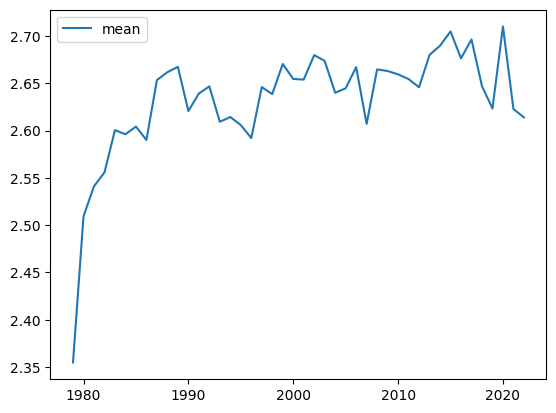

In [47]:
years = df['year'].unique()
years.sort()

mean_set = df.groupby(df.tourney_date.dt.year).mean().sets_num

plt.plot(years, mean_set, label='mean')
plt.legend()

In [32]:
df_early = df.loc[df['year'] < 2002].copy()
df_later = df.loc[df['year'] >= 2002].copy()

In [49]:
print(df_early['sets_num'].mean())
print(df_later['sets_num'].mean())

2.615407647682615
2.658777088536212


In [48]:
print(df_early.shape)
print(df_later.shape)

(80155, 51)
(62065, 51)


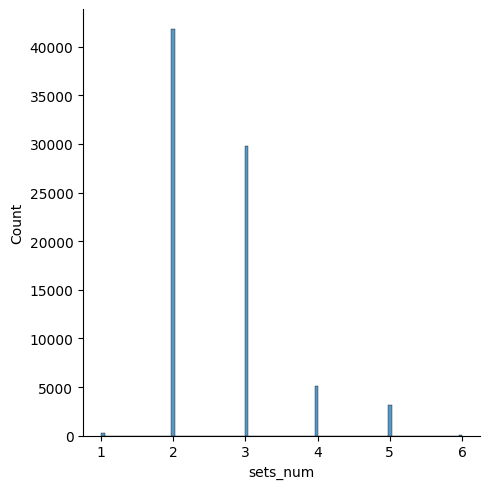

In [46]:
sns.displot(df_early['sets_num'])

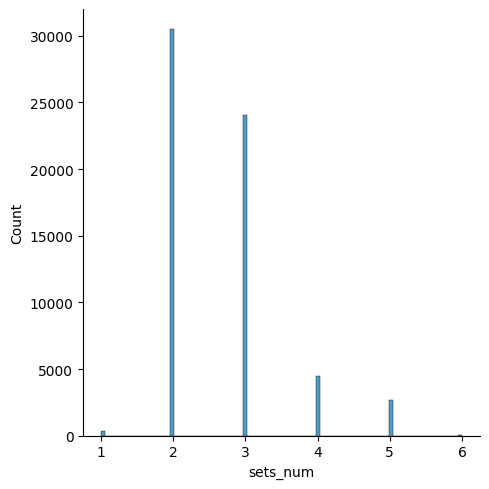

In [45]:
sns.displot(df_later['sets_num'])

In [39]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-stats.f.cdf(f, dfn, dfd) 
    return f, p

In [40]:
f_test(df_early['sets_num'], df_later['sets_num'])

(0.9468569009811845, 0.9999999999997584)

In [42]:
np.var(df_early['sets_num'], ddof=1), np.var(df_later['sets_num'], ddof=1)

(0.611886762421239, 0.6462293951569331)

Нулевая гипотеза F-test: дисперсии равны. p-val > 0.05 -> принимаем H0

In [41]:
stats.ttest_ind(df_early['sets_num'], df_later['sets_num'])

Ttest_indResult(statistic=-10.244766862849726, pvalue=1.2741388564477138e-24)

T-test используем потому, что есть 2 выборки с нормальным распределением и удовлетворяют тесту Фишера
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

H0 - Две независимые выборки имеют одинаковые средние (ожидаемые значения).
P value < 0.05, гипотезу отвергаем

Задача 3

In [60]:
df_early = df.loc[(df['year'] < 2002)&(df['best_of']==5)].copy()
df_later = df.loc[(df['year'] >= 2002)&(df['best_of']==5)].copy()

In [61]:
df_early['best_of'].value_counts()

5    16211
Name: best_of, dtype: int64

In [62]:
df_later['best_of'].value_counts()

5    14273
Name: best_of, dtype: int64

In [63]:
print(df_early['sets_num'].mean())
print(df_later['sets_num'].mean())

3.6916291407069273
3.6646815665942687


In [64]:
print(df_early.shape)
print(df_later.shape)

(16211, 51)
(14273, 51)


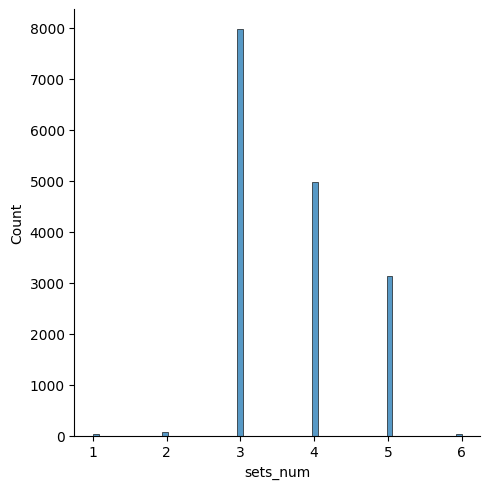

In [65]:
sns.displot(df_early['sets_num'])

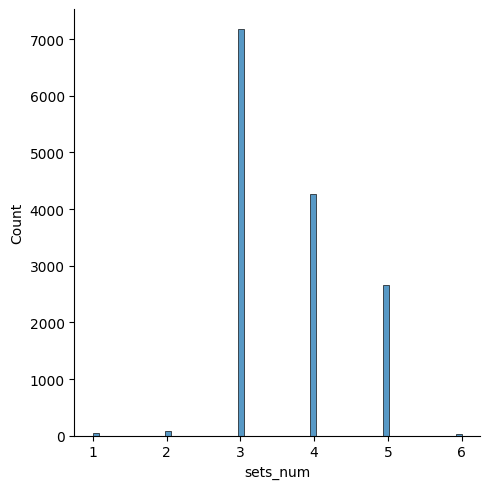

In [66]:
sns.displot(df_later['sets_num'])

In [67]:
f_test(df_early['sets_num'], df_later['sets_num'])

(0.9846156909921446, 0.8303515672363776)

In [68]:
np.var(df_early['sets_num'], ddof=1), np.var(df_later['sets_num'], ddof=1)

(0.6334024722019699, 0.6432991856586442)

In [69]:
stats.ttest_ind(df_early['sets_num'], df_later['sets_num'])

Ttest_indResult(statistic=2.9391622951833747, pvalue=0.003293474676183332)

T-test используем потому, что есть 2 выборки с нормальным распределением и удовлетворяют тесту Фишера
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

H0 - Две независимые выборки имеют одинаковые средние (ожидаемые значения).
P value < 0.05, гипотезу отвергаем

Задача 4

In [77]:
df.dropna(inplace=True,subset= ['w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced'])

In [ ]:
df[['winner_name', 'w_bpSaved', 'w_bpFaced', 'loser_name','l_bpSaved', 'l_bpFaced']]

In [130]:
safin_win = df[df['winner_name'] =='Marat Safin']
safin_lose = df[df['loser_name'] =='Marat Safin']

In [117]:
federer_win = df[df['winner_name'] =='Roger Federer']
federer_lose = df[df['loser_name'] =='Roger Federer']

In [118]:
sampras_win = df[df['winner_name'] =='Pete Sampras']
sampras_lose= df[df['loser_name'] =='Pete Sampras']

In [ ]:
safin_win[['w_bpSaved', 'w_bpFaced']]

In [ ]:
(safin_win['w_bpSaved']/safin_win['w_bpFaced']).plot.box()

In [ ]:
safin_lose[['l_bpSaved', 'l_bpFaced']]

In [ ]:
(safin_lose['l_bpSaved']/safin_lose['l_bpFaced']).plot.box()

In [162]:
safin_bPwin = pd.concat([(safin_win['w_bpSaved']/safin_win['w_bpFaced']).reset_index(drop=True), 
                         pd.Series(np.ones_like(safin_win['w_bpSaved']), name='win')], axis=1)

In [163]:
safin_bPwin = safin_bPwin.rename(columns={0: 'BP_won'})

In [164]:
safin_bPlose = pd.concat([(safin_lose['l_bpSaved']/safin_lose['l_bpFaced']).reset_index(drop=True), 
                       pd.Series(np.zeros_like(safin_lose['l_bpSaved']), name='win')], axis=1)

In [165]:
safin_bPlose = safin_bPlose.rename(columns={0: 'BP_won'})

In [166]:
BP_data = pd.concat([safin_bPwin, safin_bPlose])

In [ ]:
BP_data = BP_data.reset_index(drop=True)
BP_data

<AxesSubplot: xlabel='win', ylabel='BP_won'>

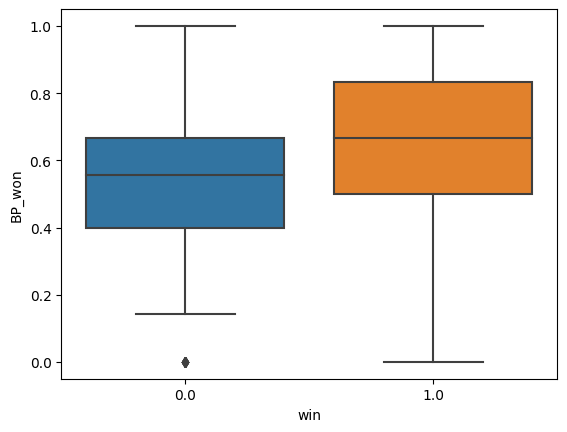

In [168]:
sns.boxplot(data=BP_data, x='win', y='BP_won')